In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt

from dev_library import df_alignment

### Exogenous processes

In [2]:
fname_data = "/home/peisenha/structExpectations/data-exchange-sciebo/df-observed-data-weighted-subsample.pkl"
df_obs = pd.read_pickle(fname_data)
df_obs["Child_present"] = (df_obs["Number_of_Children"] > 0)

df_sim = pd.read_pickle("/home/peisenha/structExpectations/development/estimations/estimation-current/df_sim.soepy.pkl")
df_sim["Child_present"] = (df_sim["Age_Youngest_Child"] >= 0)

## Child arrival

Now I compare the share of females with children in the observed and simulated samples.

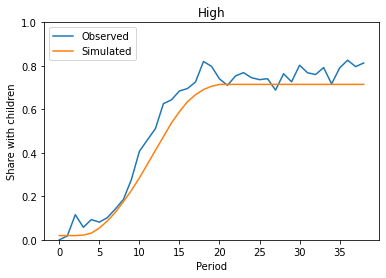

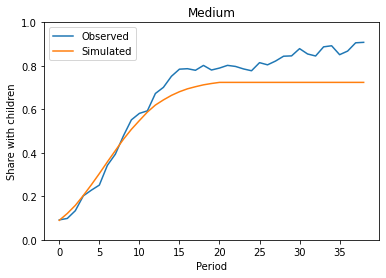

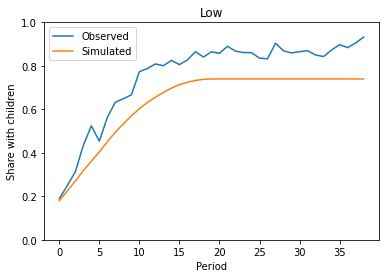

In [3]:
periods = df_obs.index.get_level_values("Period").unique().sort_values()

for edu in ["High", "Medium", "Low"]:
       
    cond = f"Education_Level == '{edu}'"
 
    grid_obs = pd.DataFrame(data=0.0, columns=["Value"], index=periods)
    info = df_obs.query(cond)["Child_present"].groupby("Period").value_counts(normalize=True).loc[slice(None), True]
    grid_obs.update(info.rename("Value")) 

    grid_sim = pd.DataFrame(data=0.0, columns=["Value"], index=periods)
    info = df_sim.query(cond)["Child_present"].groupby("Period").value_counts(normalize=True).loc[slice(None), True]
    grid_sim.update(info.rename("Value"))  
    
    fig, ax = plt.subplots()

    ax.plot(periods, grid_obs, label="Observed")
    ax.plot(periods, grid_sim, label="Simulated")
    ax.legend()
    
    ax.set_ylim([0, 1])
    ax.set_title(f"{edu}")
    ax.set_ylabel("Share with children")
    ax.set_xlabel("Period")

## Share with partner

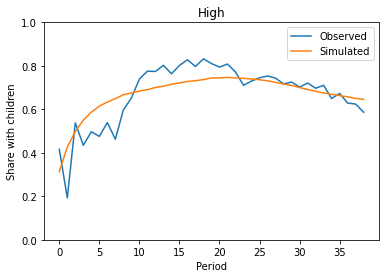

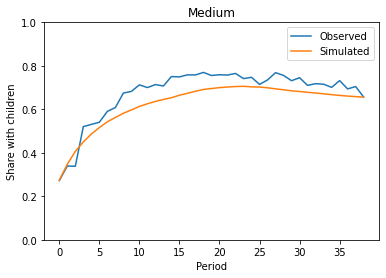

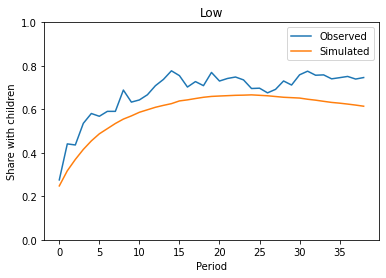

In [4]:
periods = df_obs.index.get_level_values("Period").unique().sort_values()

for edu in ["High", "Medium", "Low"]:
    
    cond = f"Education_Level == '{edu}'"
    y_obs = df_obs.query(cond)["Partner_Indicator"].groupby("Period").value_counts(normalize=True).loc[slice(None), 1]
    y_sim = df_sim.query(cond)["Partner_Indicator"].groupby("Period").value_counts(normalize=True).loc[slice(None), 1]
   
    fig, ax = plt.subplots()

    ax.plot(periods, y_obs, label="Observed")
    ax.plot(periods, y_sim, label="Simulated")
    ax.legend()
    
    ax.set_ylim([0, 1])
    ax.set_title(f"{edu}")
    ax.set_ylabel("Share with children")
    ax.set_xlabel("Period")